In [1]:
import numpy as np

In [1]:
import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D

def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            
    R = Permutation(Rlist)
    
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)

        
    return R*L #, R, L, D

In [2]:
def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

In [3]:
def equal(e,f):
    return set(e[0:2])==set(f[0:2])

In [4]:
def count_bad(G,do_twist=True):
    D = getD(G)
    F = twisted_faces2(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return L


def number_of_CDC(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return CDC

In [6]:
def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

In [107]:
K4 = graphs.CompleteGraph(4)

In [67]:
check_tw_faces(K4)

ValueError: too many values to unpack (expected 4)

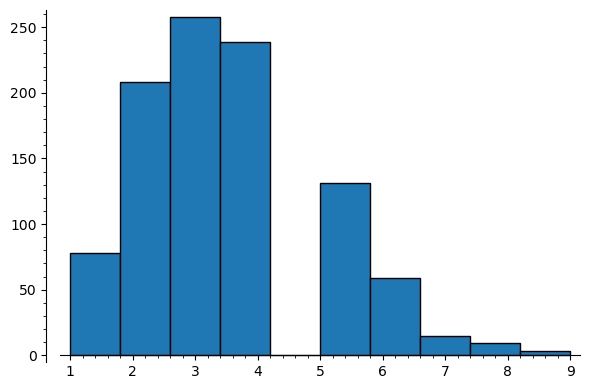

3.43700000000000

In [108]:
G3 = graphs.RandomRegular(3,100)

LG3 = sample_number_of_twisted_faces(G3, samples=1000)

histogram(LG3).show()
exp_size(LG3).n()

In [114]:
bad_G3 = sample_number_of_bad_edges(G3, do_twist=False, samples=1000)
print(bad_G3)

[40, 49, 65, 77, 58, 65, 136, 65, 68, 147, 53, 49, 52, 55, 61, 59, 107, 78, 47, 121, 101, 29, 57, 88, 104, 88, 90, 121, 49, 68, 76, 112, 77, 147, 53, 63, 113, 64, 75, 130, 66, 61, 108, 101, 85, 93, 50, 85, 27, 63, 61, 131, 147, 66, 120, 92, 75, 41, 119, 44, 138, 78, 102, 69, 37, 127, 128, 48, 58, 65, 44, 144, 77, 45, 93, 45, 97, 50, 137, 36, 51, 65, 55, 147, 59, 147, 90, 67, 39, 147, 63, 75, 79, 143, 55, 46, 40, 36, 72, 44, 122, 29, 93, 48, 137, 77, 83, 83, 85, 124, 90, 121, 83, 140, 73, 33, 69, 66, 51, 86, 48, 125, 105, 41, 39, 65, 105, 61, 126, 48, 39, 49, 126, 73, 57, 112, 78, 84, 77, 41, 54, 64, 125, 47, 64, 27, 107, 70, 87, 51, 77, 136, 57, 92, 48, 58, 78, 62, 44, 86, 139, 44, 109, 67, 46, 56, 94, 54, 143, 56, 83, 42, 64, 63, 71, 41, 67, 73, 147, 60, 114, 47, 86, 107, 74, 47, 145, 35, 77, 120, 40, 144, 131, 75, 52, 58, 55, 87, 49, 74, 51, 90, 65, 139, 75, 46, 78, 87, 50, 139, 65, 88, 88, 43, 61, 134, 71, 61, 141, 96, 84, 107, 95, 112, 50, 107, 50, 100, 59, 56, 39, 55, 71, 69, 35, 

In [116]:
number_of_CDC(G3, do_twist=False, samples=1000)

0

In [117]:
Pt = graphs.PetersenGraph()

In [118]:
bad_Pt = sample_number_of_bad_edges(Pt, samples=1000)

In [119]:
obad_Pt = sample_number_of_bad_edges(Pt, do_twist=False, samples=1000)

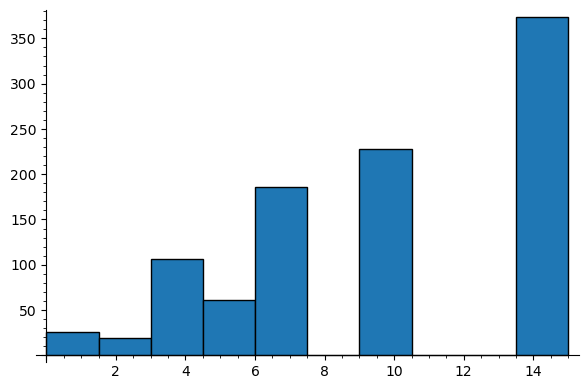

In [120]:
histogram(bad_Pt)

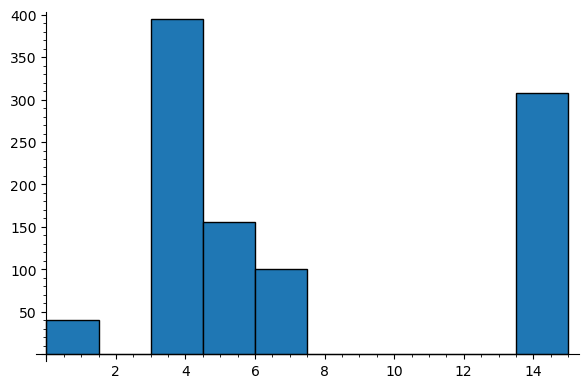

In [121]:
histogram(obad_Pt)

In [122]:
np.mean(bad_Pt)/Pt.num_verts()

0.9739000000000001

In [123]:
np.mean(obad_Pt)/Pt.num_verts()

0.7304999999999999

In [77]:
G = graphs.CompleteGraph(4)
do_twist=True
D = getD(G)
F = twisted_faces2(G,do_twist=do_twist)
print(F)
bad = 0
print(F.cycle_tuples())
for face in F.cycle_tuples():
    edges = [tuple(sorted(D[x][:2])) for x in face]
    print(edges)
    print(set(edges))
    bad += len(edges) - len(set(edges))
    print(bad)
        
    
def sample_number_of_bad_edges(G,do_twist=True,samples=10):
    return [count_bad(G,do_twist=do_twist) for _ in range(samples)]

[13, 20, 19, 7, 8, 14, 16, 21, 22, 1, 2, 15, 23, 9, 3, 24, 10, 4, 12, 18, 17, 6, 5, 11]
[(1, 13, 23, 5, 8, 21, 17, 10), (2, 20, 18, 4, 7, 16, 24, 11), (3, 19, 12, 15), (6, 14, 9, 22)]
[(0, 1), (0, 2), (2, 3), (0, 3), (0, 1), (1, 3), (2, 3), (1, 2)]
{(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)}
2
[(0, 1), (0, 3), (2, 3), (0, 2), (0, 1), (1, 2), (2, 3), (1, 3)]
{(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)}
4
[(0, 2), (0, 3), (1, 3), (1, 2)]
{(1, 2), (0, 2), (0, 3), (1, 3)}
4
[(0, 3), (0, 2), (1, 2), (1, 3)]
{(1, 2), (0, 2), (0, 3), (1, 3)}
4


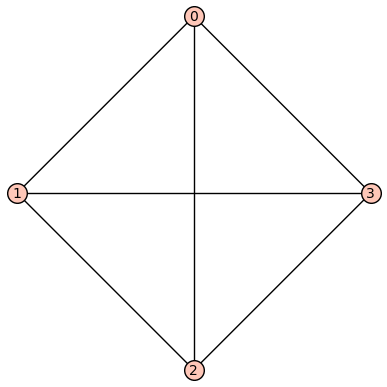

In [27]:
G.show()

In [45]:
print([count_bad(G) for _  in range(1000)])

[6, 3, 6, 6, 2, 3, 1, 2, 3, 6, 6, 6, 3, 2, 6, 2, 3, 3, 6, 6, 2, 6, 3, 0, 6, 2, 6, 0, 3, 2, 3, 2, 6, 6, 6, 3, 6, 3, 3, 2, 3, 6, 6, 2, 6, 6, 3, 3, 6, 6, 6, 1, 6, 2, 3, 6, 6, 6, 6, 2, 6, 2, 3, 3, 6, 1, 1, 2, 6, 3, 3, 3, 2, 6, 6, 3, 1, 3, 2, 2, 6, 3, 3, 6, 6, 2, 6, 0, 2, 6, 3, 3, 3, 6, 6, 3, 6, 2, 2, 6, 3, 3, 2, 3, 6, 3, 6, 2, 6, 6, 6, 3, 3, 3, 6, 2, 2, 6, 6, 6, 2, 3, 6, 3, 6, 3, 3, 2, 6, 2, 1, 2, 3, 3, 6, 6, 6, 3, 6, 6, 1, 3, 6, 2, 1, 6, 6, 2, 3, 6, 2, 2, 1, 2, 6, 6, 3, 2, 3, 6, 6, 2, 3, 3, 1, 3, 0, 1, 6, 6, 6, 6, 6, 3, 2, 6, 3, 6, 6, 3, 2, 1, 6, 6, 2, 1, 3, 6, 3, 6, 6, 6, 3, 6, 3, 3, 1, 2, 2, 3, 3, 3, 3, 1, 6, 3, 1, 2, 2, 6, 2, 6, 6, 6, 2, 6, 6, 6, 6, 6, 1, 6, 6, 6, 3, 6, 6, 2, 6, 6, 0, 6, 3, 2, 6, 2, 6, 0, 3, 3, 0, 6, 6, 2, 6, 6, 6, 6, 2, 3, 6, 2, 2, 3, 2, 2, 6, 3, 2, 0, 3, 1, 3, 3, 6, 6, 6, 2, 2, 2, 6, 6, 6, 2, 6, 6, 6, 3, 0, 6, 6, 2, 0, 3, 3, 6, 6, 6, 6, 2, 6, 6, 3, 2, 6, 6, 6, 3, 3, 3, 1, 1, 1, 2, 2, 3, 6, 1, 6, 2, 6, 6, 3, 2, 6, 2, 6, 6, 3, 6, 6, 6, 3, 3, 6, 3, 2, 3, 1, 6, 6, 2, 6, 

In [11]:
Pt = graphs.PetersenGraph()

In [99]:
bad_pt = sample_number_of_bad_edges(pt)

In [124]:
obad_Pt = sample_number_of_bad_edges(Pt, do_twist=False, samples=10000)
print(obad_Pt)

[15, 6, 5, 0, 6, 6, 3, 5, 15, 4, 15, 15, 15, 4, 5, 15, 5, 15, 0, 15, 6, 15, 3, 5, 15, 15, 4, 5, 5, 3, 15, 15, 6, 3, 5, 15, 15, 15, 3, 4, 3, 4, 15, 3, 6, 15, 6, 3, 6, 5, 15, 3, 5, 3, 4, 3, 6, 3, 3, 15, 3, 0, 15, 6, 6, 4, 4, 15, 5, 3, 15, 3, 0, 15, 3, 3, 15, 15, 3, 3, 3, 15, 6, 15, 5, 15, 3, 0, 3, 5, 3, 6, 15, 6, 3, 6, 3, 15, 15, 3, 3, 6, 3, 6, 6, 5, 6, 15, 5, 3, 15, 6, 4, 3, 15, 15, 3, 15, 5, 15, 4, 6, 15, 6, 6, 3, 5, 3, 4, 15, 6, 15, 3, 15, 4, 3, 4, 5, 15, 3, 5, 6, 4, 4, 4, 6, 5, 15, 15, 15, 15, 4, 15, 15, 15, 15, 3, 4, 15, 6, 4, 15, 3, 3, 15, 4, 15, 15, 5, 4, 3, 5, 3, 15, 6, 4, 15, 3, 5, 3, 15, 3, 6, 3, 15, 3, 15, 3, 15, 15, 3, 6, 6, 4, 4, 6, 15, 5, 4, 3, 15, 15, 15, 15, 5, 15, 4, 15, 15, 6, 15, 4, 3, 0, 15, 5, 6, 5, 3, 4, 15, 3, 6, 3, 15, 3, 6, 3, 3, 15, 15, 3, 6, 3, 6, 6, 5, 15, 15, 15, 15, 4, 15, 15, 15, 15, 5, 5, 5, 15, 6, 3, 3, 15, 15, 5, 0, 3, 15, 3, 6, 3, 15, 6, 15, 4, 15, 15, 5, 4, 15, 15, 3, 15, 4, 5, 6, 15, 6, 4, 4, 3, 3, 5, 3, 3, 15, 5, 15, 5, 15, 0, 3, 15, 6, 15, 3, 3, 5, 

In [145]:
number_of_CDC(Pt, do_twist=False, samples=100)

2

In [146]:
number_of_CDC(Pt, do_twist=False, samples=1000)

43

In [13]:
number_of_CDC(Pt, do_twist=True, samples=10000)

16

In [148]:
number_of_CDC(Pt, do_twist=False, samples=100000)

3898

In [149]:
number_of_CDC(Pt, do_twist=False, samples=1000000)

39534

In [22]:
np.mean(bad_Pt)/Pt.num_verts()

0.9798

In [23]:
np.mean(obad_Pt)/Pt.num_verts()

0.7237

In [152]:
B1 = graphs.BlanusaFirstSnarkGraph()

In [159]:
number_of_CDC(B1, do_twist=False, samples=100)

1

In [160]:
number_of_CDC(B1, do_twist=False, samples=1000)

1

In [161]:
number_of_CDC(B1, do_twist=False, samples=10000)

19

In [162]:
number_of_CDC(B1, do_twist=False, samples=100000)

115

In [163]:
number_of_CDC(B1, do_twist=False, samples=1000000)

1123

In [164]:
B2 = graphs.BlanusaSecondSnarkGraph()

In [165]:
number_of_CDC(B2, do_twist=False, samples=100)

0

In [166]:
number_of_CDC(B2, do_twist=False, samples=1000)

0

In [167]:
number_of_CDC(B2, do_twist=False, samples=10000)

14

In [168]:
number_of_CDC(B2, do_twist=False, samples=100000)

151

In [169]:
number_of_CDC(B2, do_twist=False, samples=1000000)

1558

In [170]:
number_of_CDC(B2, do_twist=False, samples=10000000)

15162